# Как пандемия влияет на финансовые рынки.

Работу выполнили студенты 2 курса Высшей школы ИТИС Мубараков Эмиль и Мухутдинова Алия, группа 11-805

Цель проекта: узнать какое влияние оказывает COVID-19 на финансовые рынки, анализируем текущую ситуацию и сравниваем с тем, как реагировал глобальный рынок на минувшие пандемии.

Анализ ситуации будет произведен на основе рассмотрения четырёх макроэкономических индексов:
- S&P 500 – фондовый индекс, в корзину которого включено 505 избранных торгуемых на фондовых биржах США публичных компаний, имеющих наибольшую капитализацию.
- Crude Oil – индекс цены на нефть.
- Gold – индекс цены на золото.
- TLT – индекс доходности долгосрочных казначейских облигаций США.

In [78]:
# Читаем данные (pandas_datareader - это дополнительный пакет, который позволяет создавать данные из различных интернет-источников)
import pandas_datareader as pdr

# Построение графиков
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')


import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

## Сначала построим график для индекса S&P500, для тренировки

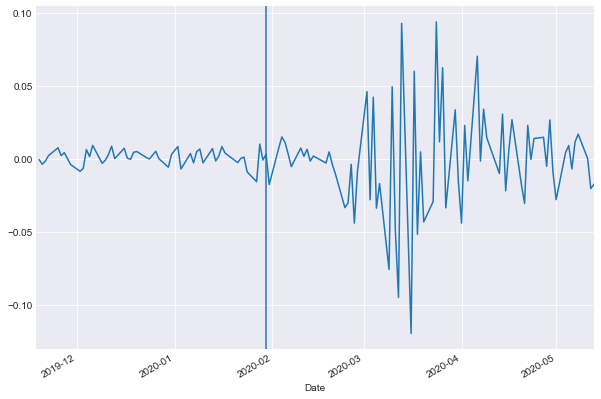

In [79]:

data_sp = pdr.get_data_yahoo('^GSPC', '17-Nov-19')


data_pc = data_sp.Close.pct_change()


data_pc.plot(figsize=(10, 7), grid=True)
plt.axvline('30-Jan-20')
plt.show()

# Теперь рассмаотрим все остальные выше перечисленные индексы

In [80]:
# Читаем файл
timelines = pd.read_csv('/Users/emilmubarakov/Desktop/Sem/pandemics_timelines.csv').dropna()
for col in timelines.columns[1:]:
    timelines[col] = pd.to_datetime(timelines[col])
timelines 

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,2019-11-17,2020-01-30,2020-03-11,2020-07-31
1,SARS,2002-11-16,2003-03-26,2003-03-26,2003-07-05
2,Swine Flu,2009-04-15,2009-04-25,2009-06-11,2010-08-11
3,Hong Kong Flu,1968-07-01,1968-09-30,1968-09-30,1970-12-31
4,Asian Flu,1957-02-28,1957-06-30,1957-06-30,1958-12-31
5,EBOLA,2013-12-01,2014-08-08,2014-08-08,2016-01-14
6,WWII,1939-09-01,1939-09-01,1939-09-01,1945-09-02


### Получаем данные

In [81]:
# Читаем данные из yahoo fianance
def get_data(tl):    
    inst_list = ['^GSPC', 'CL=F','Gold', 'TLT']
    data = pd.DataFrame()
    for inst in inst_list:
        try:
            data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except Exception as e:
            print('No data available for ',inst, e)

    return data

In [82]:
# Получаем данные во время covid19
covid_timelines = timelines.loc[timelines.pandemic_name=='covid19']
data= get_data(covid_timelines)
data.head()

,^GSPC,CL=F,Gold,TLT
Date,,,,
2019-10-18,2986.199951,53.779999,17.030994,138.061981
2019-10-21,3006.719971,53.310001,16.674322,137.023407
2019-10-22,2995.989990,54.160000,16.446449,137.824570
2019-10-23,3004.520020,55.970001,16.416727,137.963043
2019-10-24,3010.290039,56.230000,17.011177,137.686111


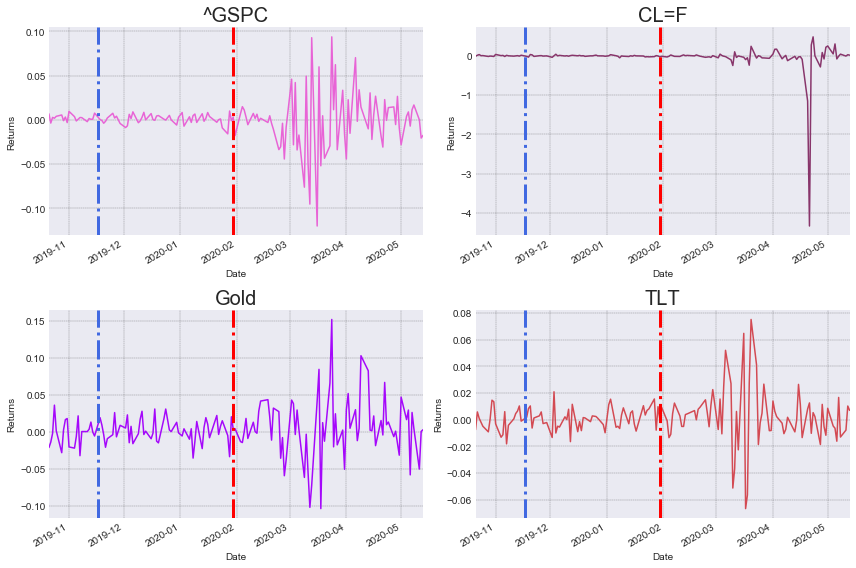

In [83]:
# Строим график ежедневного процентного изменения
def plot_daily_pc(data, tl):
    data_pc = data.pct_change().dropna()
    fig = plt.figure(figsize=(12, 8))
    i = 0
    for col in data_pc.columns:
        # Add the subplot
        sub = fig.add_subplot(2, 2, i+1)
        i = i+1
        # Set title
        sub.set_title(col, fontsize=20)
        # Plot
        r = random.random()
        b = random.random()
        g = random.random()
        data_pc[col].plot(color=(r, g, b))
        sub.set_ylabel('Returns')
        sub.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
        sub.axvline(x=tl.first_case.iloc[0], color='RoyalBlue',
                    linestyle='dashdot', linewidth=3)
        sub.axvline(x=tl.who_emergency.iloc[0], color='Red',
                    linestyle='dashdot', linewidth=3)

    plt.tight_layout()
    plt.show()
    
plot_daily_pc(data, covid_timelines)

### Построим кривые совокупной доходности акций для перечисленных индексов.

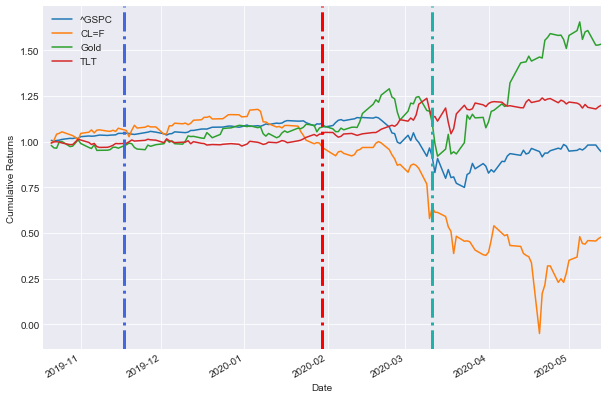

In [84]:
def plot_cumulative_returns(data,tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    data_cum_ret.plot(figsize=(10,7),grid=True)
    plt.legend(loc='best')
    plt.ylabel('Cumulative Returns')
    plt.axvline(x=tl.first_case.iloc[0],color='RoyalBlue',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.who_emergency.iloc[0],color='Red',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.pandemic_declaration.iloc[0],color='LightSeaGreen',linestyle='dashdot',linewidth=3)
    plt.axvspan(tl.last_date.iloc[0], tl.last_date.iloc[0]+timedelta(days=365),color='dodgerblue', alpha=0.2)
    plt.show()
    
plot_cumulative_returns(data, covid_timelines)

Доходность от нефти после объявления упала сильнее всего – в течение указанного периода

### Что происходит с секторами экономики, входящими в индекс S&P500? Построим график, который учитывает основные секторы рынка.

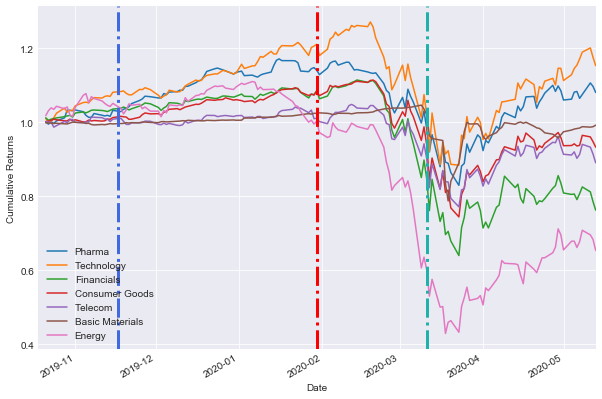

In [85]:
def plot_sector(tl):
    sector_list = ['IHE', 'IYW', 'IYF', 'IYK', 'IYZ','ITM', 'IYE']

    columns = ['Pharma', 'Technology', 'Financials', 'Consumer Goods',
               'Telecom', 'Basic Materials', 'Energy']

    sector_data = pd.DataFrame()
    for inst in sector_list:
        try:
            sector_data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except:
            pass

    sector_data.columns = columns
    plot_cumulative_returns(sector_data, tl)
plot_sector(covid_timelines)    

Два сектора, которые оказались наименее подвержены влиянию – это фармацевтика и технологии. Однако в целом, все секторы находятся в «одной поре», пусть относительная величина и отличается. Наибольшие трудности испытывает энергетический сектор – это логично, учитывая, как пострадал показатель Crude Oil.

In [86]:
def plot_analytics(data, timelines):
    plot_daily_pc(data, timelines)
    plot_cumulative_returns(data, timelines)
#    plot_drawdown(drawdown,timelines)    
    first_case_date = timelines.who_emergency.iloc[0]

# Рассмотрим эпедемии в другие года

Далее рассмотрим варианты развития ситуации с вирусом, опираясь на прежний опыт. В истории уже случались вспышки пандемии, нанёсшие колоссальный вред рынкам – полезно разобраться, как справлялось человечество в былые времена.

In [87]:
for col in timelines.columns[1:]:
    timelines[col] = pd.to_datetime(timelines[col])
timelines    

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,2019-11-17,2020-01-30,2020-03-11,2020-07-31
1,SARS,2002-11-16,2003-03-26,2003-03-26,2003-07-05
2,Swine Flu,2009-04-15,2009-04-25,2009-06-11,2010-08-11
3,Hong Kong Flu,1968-07-01,1968-09-30,1968-09-30,1970-12-31
4,Asian Flu,1957-02-28,1957-06-30,1957-06-30,1958-12-31
5,EBOLA,2013-12-01,2014-08-08,2014-08-08,2016-01-14
6,WWII,1939-09-01,1939-09-01,1939-09-01,1945-09-02


### Рассмотрим эпедемию SARS, как она повлияла на экономику

---------------------------------
SARS
---------------------------------
                 ^GSPC       CL=F       Gold        TLT
Date                                                   
2002-10-17  879.200012  29.620001  11.253495  45.532295
2002-10-18  884.390015  29.600000  11.090964  45.649963
2002-10-21  899.719971  28.379999  11.013575  45.206146
2002-10-22  890.159973  27.920000  11.508909  45.077816
2002-10-23  896.140015  28.180000  11.299936  45.093876
---------------------------------


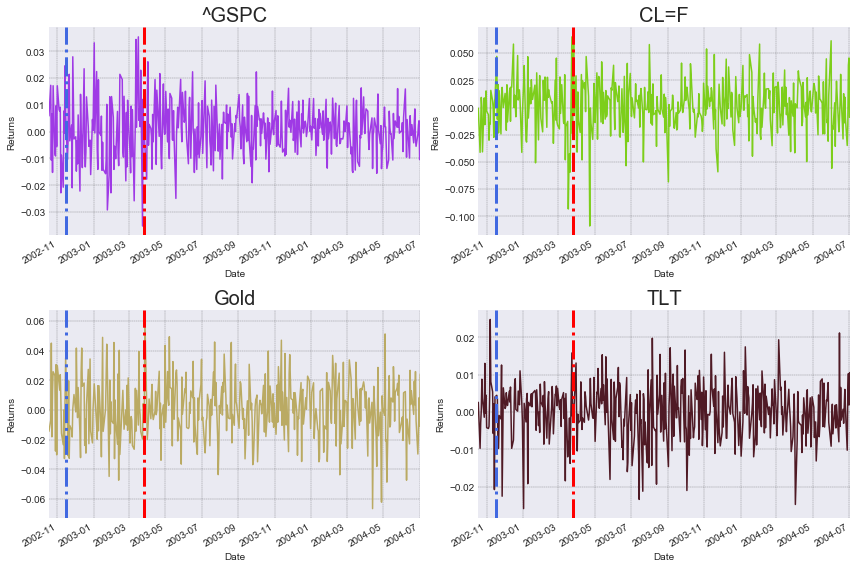

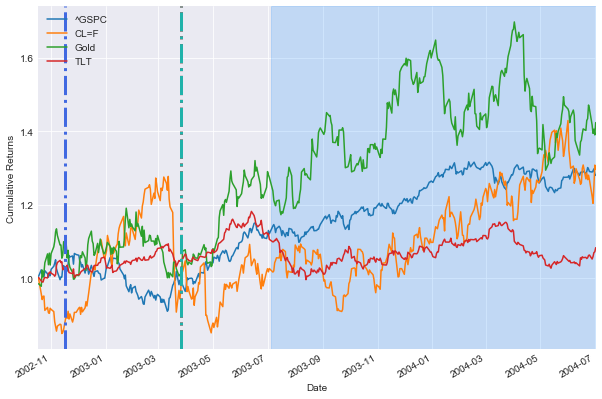

None


In [88]:
p = 'SARS'
print("---------------------------------")
print(p)
tl = timelines[timelines.pandemic_name == p]

print("---------------------------------")
data = get_data(tl)
print(data.head())

print("---------------------------------")
print(plot_analytics(data, tl))

Тут показано, как пошли дела, когда ВОЗ объявила, что кризис болезни преодолён. Голубая область соответствует времени, когда это было объявлено



### Рассмотрим эпедемию Swine Flu, как она повлияла на экономику

---------------------------------
Swine Flu
---------------------------------
                 ^GSPC       CL=F       Gold        TLT
Date                                                   
2009-03-16  753.890015  47.349998  25.104719  73.026718
2009-03-17  778.119995  49.160000  24.604319  72.629478
2009-03-18  794.349976  48.139999  27.089342  75.381264
2009-03-19  784.039978  51.610001  28.293690  75.475151
2009-03-20  768.539978  51.060001  28.319126  75.056244
---------------------------------


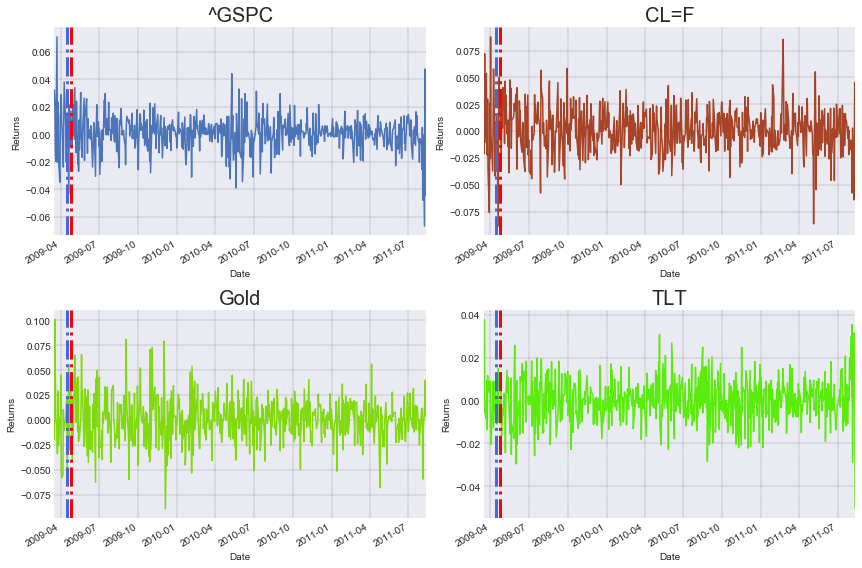

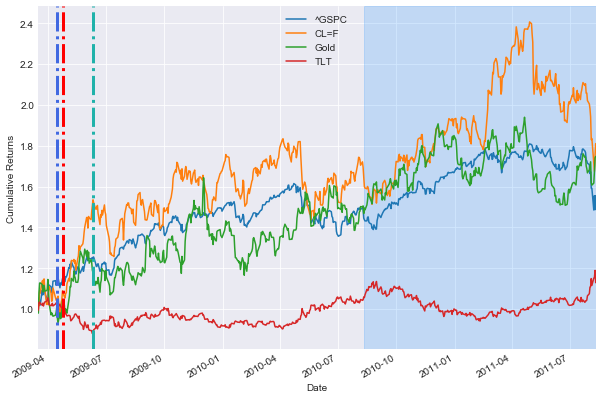

None


In [89]:
p = 'Swine Flu'
print("---------------------------------")
print(p)
tl = timelines[timelines.pandemic_name == p]

print("---------------------------------")
data = get_data(tl)
print(data.head())

print("---------------------------------")
print(plot_analytics(data, tl))

Тут показано, как пошли дела, когда ВОЗ объявила, что кризис болезни преодолён. Голубая область соответствует времени, когда это было объявлено

### Рассмотрим эпедемию Hong Kong Flu, как она повлияла на экономику

---------------------------------
Hong Kong Flu
---------------------------------
No data available for  CL=F 'Date'
No data available for  Gold 'Date'
No data available for  TLT 'Date'
                 ^GSPC
Date                  
1968-06-03   99.989998
1968-06-04  100.379997
1968-06-05   99.889999
1968-06-06  100.650002
1968-06-07  101.269997
---------------------------------


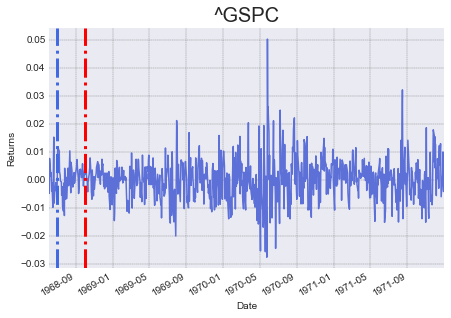

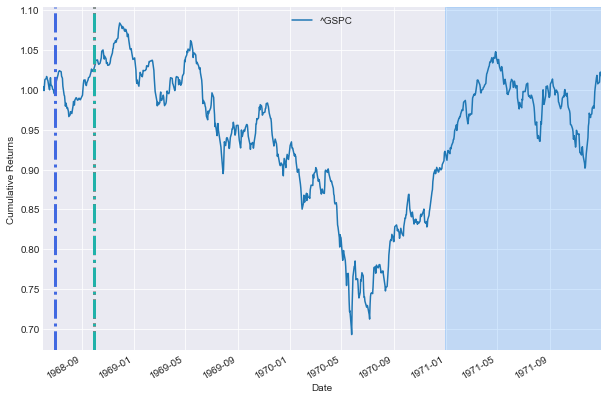

None


In [90]:
p = 'Hong Kong Flu'
print("---------------------------------")
print(p)
tl = timelines[timelines.pandemic_name == p]

print("---------------------------------")
data = get_data(tl)
print(data.head())

print("---------------------------------")
print(plot_analytics(data, tl))

Тут показано, как пошли дела, когда ВОЗ объявила, что кризис болезни преодолён. Голубая область соответствует времени, когда это было объявлено. Данные об: TLT, Gold и нефти (Crude oil) не доступны.

### Рассмотрим эпедемию Asian Flu, как она повлияла на экономику

---------------------------------
Asian Flu
---------------------------------
No data available for  CL=F 'Date'
No data available for  Gold 'Date'
No data available for  TLT 'Date'
                ^GSPC
Date                 
1957-01-29  44.709999
1957-01-30  44.910000
1957-01-31  44.720001
1957-02-01  44.619999
1957-02-04  44.529999
---------------------------------


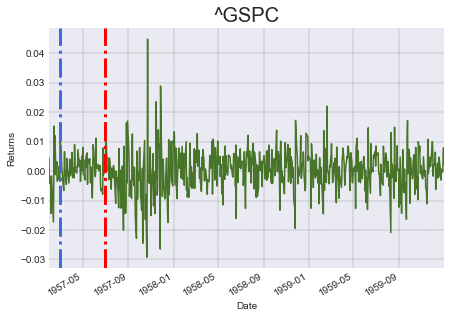

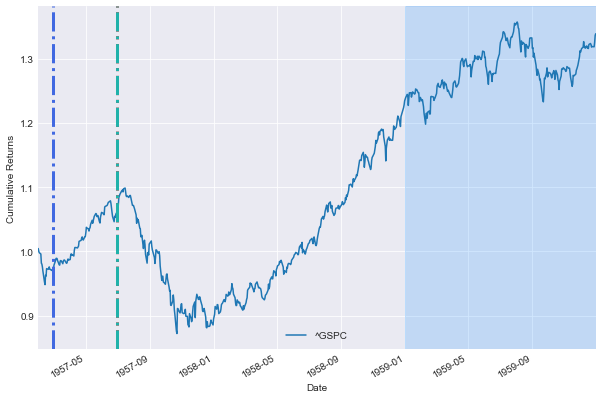

None


In [91]:
p = 'Asian Flu'
print("---------------------------------")
print(p)
tl = timelines[timelines.pandemic_name == p]

print("---------------------------------")
data = get_data(tl)
print(data.head())

print("---------------------------------")
print(plot_analytics(data, tl))

Тут показано, как пошли дела, когда ВОЗ объявила, что кризис болезни преодолён. Голубая область соответствует времени, когда это было объявлено. Данные об: TLT, Gold и нефти (Crude oil) не доступны.

### Рассмотрим эпедемию EBOLA, как она повлияла на экономику

---------------------------------
EBOLA
---------------------------------
                  ^GSPC       CL=F       Gold        TLT
Date                                                    
2013-11-01  1761.640015  94.610001  16.559011  89.989594
2013-11-04  1767.930054  94.620003  16.834843  90.074333
2013-11-05  1762.969971  93.370003  16.807259  88.998108
2013-11-06  1770.489990  94.800003  16.862425  89.040482
2013-11-07  1747.150024  94.199997  16.715321  89.794685
---------------------------------


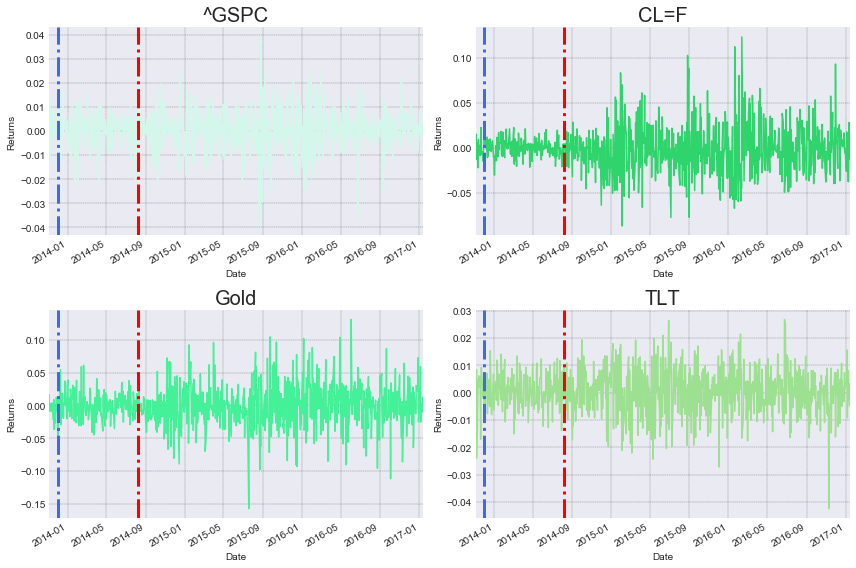

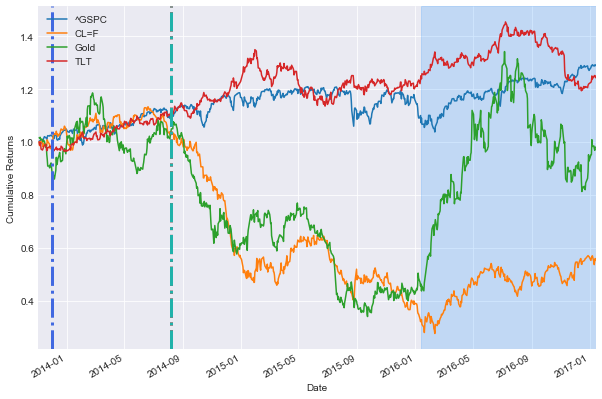

None


In [92]:
p = 'EBOLA'
print("---------------------------------")
print(p)
tl = timelines[timelines.pandemic_name == p]

print("---------------------------------")
data = get_data(tl)
print(data.head())

print("---------------------------------")
print(plot_analytics(data, tl))

Тут показано, как пошли дела, когда ВОЗ объявила, что кризис болезни преодолён. Голубая область соответствует времени, когда это было объявлено

### Рассмотрим эпедемию WWll, как она повлияла на экономику

---------------------------------
WWII
---------------------------------
No data available for  CL=F 'Date'
No data available for  Gold 'Date'
No data available for  TLT 'Date'
            ^GSPC
Date             
1939-08-02  12.16
1939-08-03  12.12
1939-08-04  11.90
1939-08-07  11.84
1939-08-08  11.87
---------------------------------


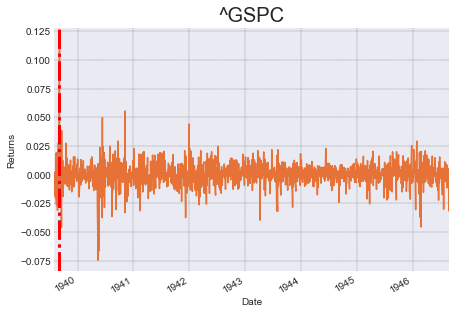

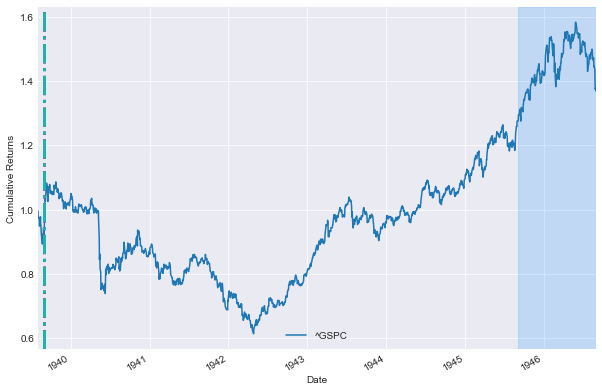

None


In [93]:
p = 'WWII'
print("---------------------------------")
print(p)
tl = timelines[timelines.pandemic_name == p]

print("---------------------------------")
data = get_data(tl)
print(data.head())

print("---------------------------------")
print(plot_analytics(data, tl))

Тут показано, как пошли дела, когда ВОЗ объявила, что кризис болезни преодолён. Голубая область соответствует времени, когда это было объявлено. Данные об: TLT, Gold и нефти (Crude oil) не доступны.

## Заключение

Рынок не любит неопределённости. Когда объявляется чрезвычайное положение, он резко падает. Но как только предпринимаются необходимые шаги для сдерживания ситуации и ВОЗ объявляет её безопасной, рынок реагирует подъёмом на докризисный уровень, а в некоторых случаях даже превосходит его.